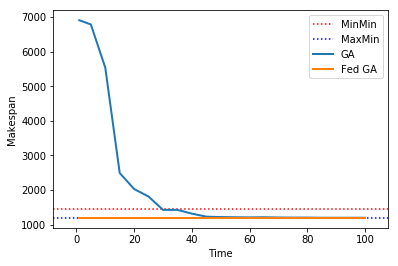

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes

rootAddress = '/home/nassiram/dev/assignments/cloud-computing/a2/cloudsim-cloudsim-4.0/outputs/'
setting = 'High Machine Heterogeneity/250'

file = open(rootAddress + setting + '/experimentOutput.txt')

ga_x_values = []
ga_y_values = []

fga_x_values = []
fga_y_values = []

line = file.readline()

while(line):
    
    values = line.split(',')
    
    if values[0] == 'MinMin':
        min_min = float(values[1])
        
    elif values[0] == 'MaxMin':
        max_min = float(values[1])
        
    elif values[0].startswith('GA-'):
        
        dashIndex = int(values[0].index('-')) + 1
        xIndex = int(values[0].index('x'))
        
        ga_x_values.append(float(values[0][dashIndex:xIndex]))
        ga_y_values.append(float(values[1]))
        
    elif values[0].startswith('FGA-'):
        
        dashIndex = int(values[0].index('-')) + 1
        xIndex = int(values[0].index('x'))
        
        fga_x_values.append(float(values[0][dashIndex:xIndex]))
        fga_y_values.append(float(values[1]))
    
    line = file.readline()

file.close()

plt.axhline(y=min_min, color='r', linestyle=':', label='MinMin')
plt.axhline(y=max_min, color='b', linestyle=':', label='MaxMin')

plt.plot(ga_x_values, ga_y_values, linewidth=2, label='GA')
plt.plot(fga_x_values, fga_y_values, linewidth=2, label='Fed GA')

plt.xlabel('Time')
plt.ylabel('Makespan')
plt.legend()

plt.xlim(-8,108)

figure_name = '/' + setting.replace('/',' - ') + '.png'

plt.savefig(rootAddress + setting + figure_name, dpi=300)
plt.show()

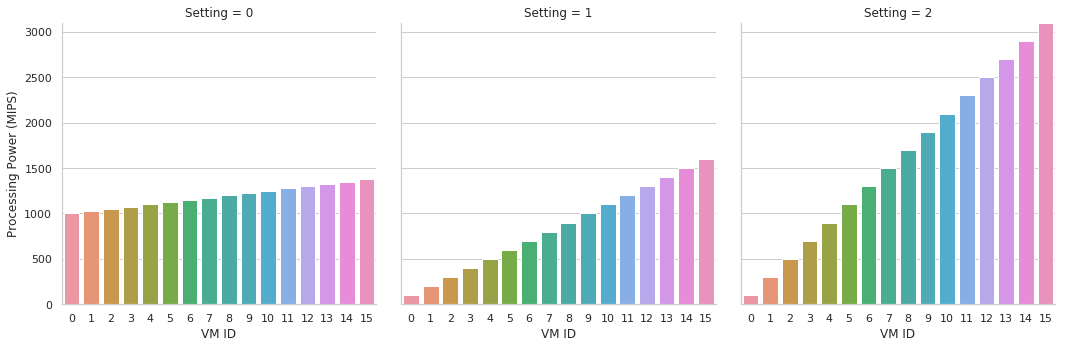

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rootAddress = '/home/nassiram/dev/assignments/cloud-computing/a2/cloudsim-cloudsim-4.0/outputs/'
setting = 'Low Machine Heterogeneity'


file = open(rootAddress + setting + '/VmSpecifications.txt')

specs = file.readline()
specs = specs.split('-')

file.close()

spec_list = []

for i, spec in enumerate(specs):
    spec = spec.split(',')
    spec_list.append([0, i, int(spec[1])])
    
    
setting = 'Medium Machine Heterogeneity'

file = open(rootAddress + setting + '/VmSpecifications.txt')

specs = file.readline()
specs = specs.split('-')

file.close()

for i, spec in enumerate(specs):
    spec = spec.split(',')
    spec_list.append([1, i, int(spec[1])])

    
setting = 'High Machine Heterogeneity'

file = open(rootAddress + setting + '/VmSpecifications.txt')

specs = file.readline()
specs = specs.split('-')

file.close()


for i, spec in enumerate(specs):
    spec = spec.split(',')
    spec_list.append([2, i, int(spec[1])])
    
sns.set(style="whitegrid")
data = pd.DataFrame(np.array(spec_list), columns=['Setting', 'VM ID', 'Processing Power (MIPS)'])

g = sns.catplot(x="VM ID", y="Processing Power (MIPS)",
                hue="VM ID", col="Setting", data=data, kind="bar", dodge=False)
plt.ylim(0,3100)

figure_name = '/VmSpecifications.png'

plt.savefig(rootAddress + figure_name, dpi=300)
plt.show()